In [1]:
# removed the housing values above 5

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = fetch_california_housing(as_frame=True)
ca_df = data.frame

# Display basic info
ca_df.info()
ca_df.describe()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


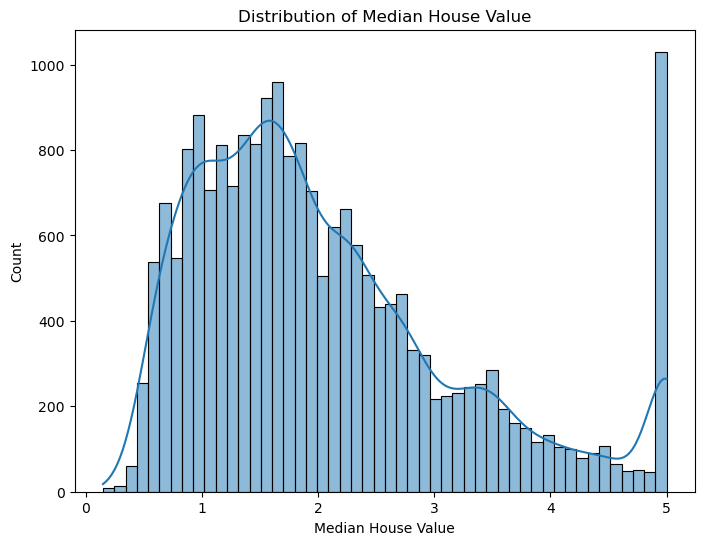

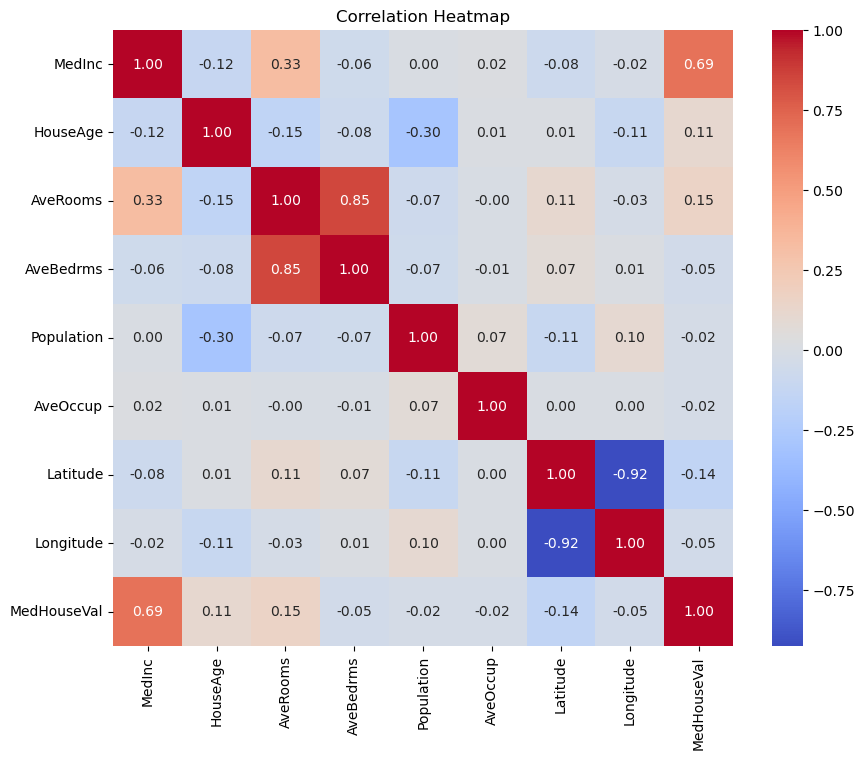

In [2]:
# Check for missing values
print(ca_df.isnull().sum())

# Plot the distribution of the target variable (Median House Value)
plt.figure(figsize=(8, 6))
sns.histplot(ca_df['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.show()

# Explore correlations between features and target
correlations = ca_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



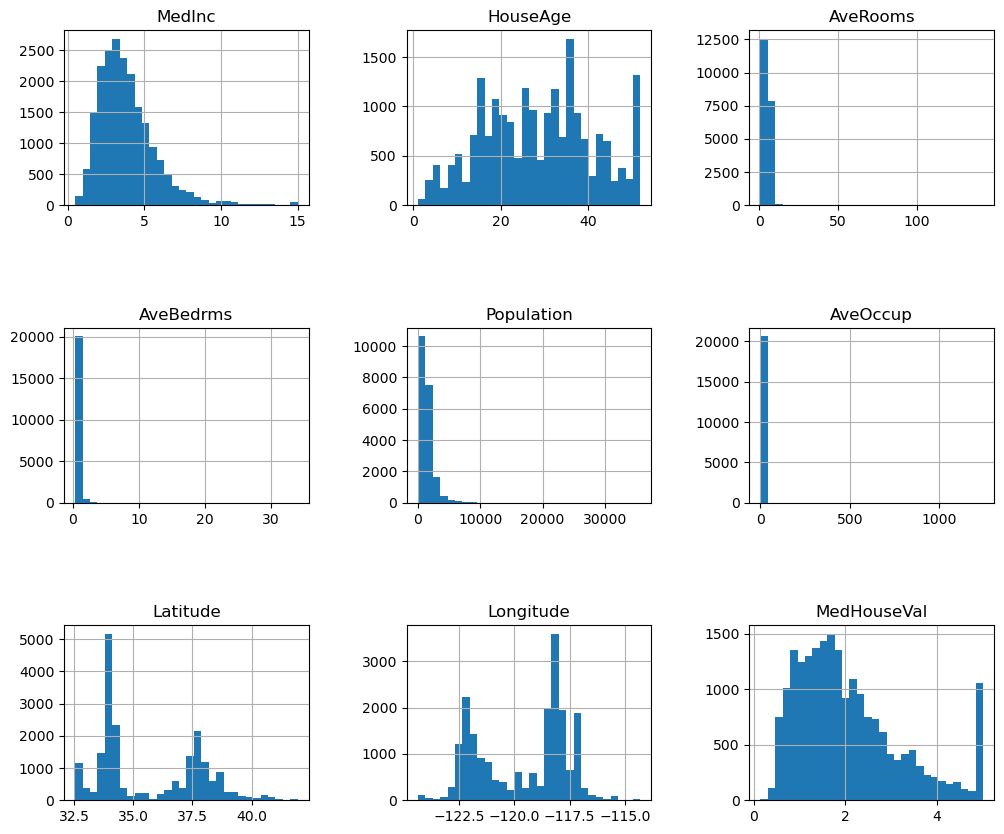

In [3]:
ca_df.hist(figsize=(12, 10), bins=30)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [4]:
ca_df_new = ca_df[ca_df['MedHouseVal'] <= 5]

In [5]:
ca_df_new.info()
ca_df_new.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19675 non-null  float64
 1   HouseAge     19675 non-null  float64
 2   AveRooms     19675 non-null  float64
 3   AveBedrms    19675 non-null  float64
 4   Population   19675 non-null  float64
 5   AveOccup     19675 non-null  float64
 6   Latitude     19675 non-null  float64
 7   Longitude    19675 non-null  float64
 8   MedHouseVal  19675 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,3.676717,28.386277,5.360901,1.096618,1440.812198,3.095189,35.651780,-119.563192,1.924779
std,1.570272,12.509113,2.292538,0.451839,1143.648725,10.631977,2.149802,2.006108,0.977115
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.526800,18.000000,4.414568,1.005894,796.000000,2.445486,33.930000,-121.760000,1.166000
50%,3.450000,28.000000,5.184322,1.048622,1179.000000,2.837134,34.270000,-118.500000,1.738000
75%,4.582600,37.000000,5.970677,1.099338,1746.000000,3.304894,37.730000,-117.990000,2.482000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000000


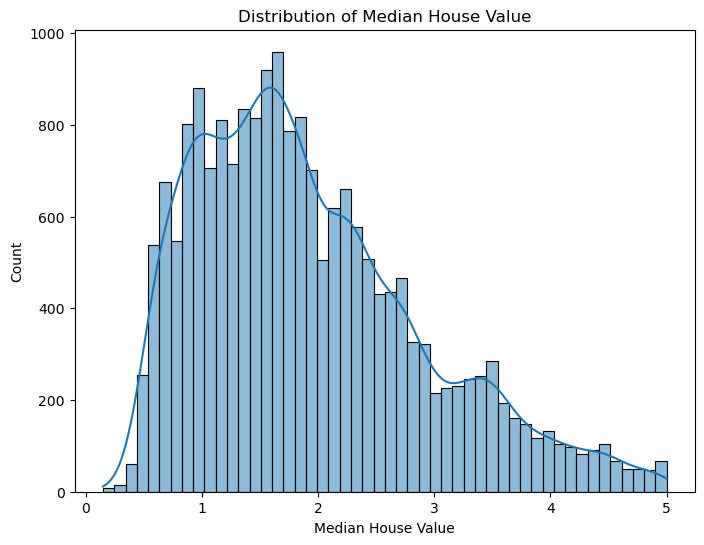

In [6]:
# Plot the distribution of the target variable (Median House Value)
plt.figure(figsize=(8, 6))
sns.histplot(ca_df_new['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.show()

In [7]:
# Define the feature matrix and target vector
X = ca_df_new.drop(['MedHouseVal'], axis=1)
y = ca_df_new['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = lin_reg.predict(X_test_scaled)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred)}")


Linear Regression MSE: 0.4238967681845708
Linear Regression R2 Score: 0.5748697510633902


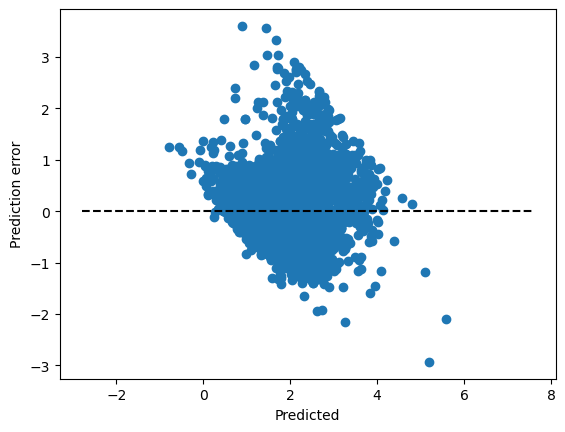

In [9]:
y_pred_error = y_test - y_pred

fig = plt.figure()
plt.scatter(y_pred, y_pred_error)
plt.xlabel('Predicted')
plt.ylabel('Prediction error')
plt.plot([min(y_pred)-2, max(y_pred)+2], [0,0], linestyle='dashed', color='black')

<function matplotlib.pyplot.show(close=None, block=None)>

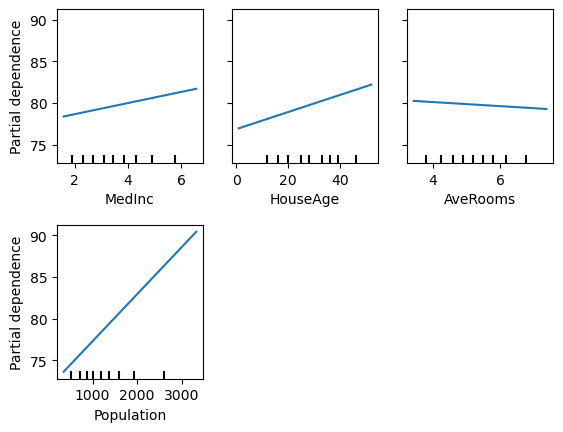

In [10]:
#fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(lin_reg, X, features=[0, 1, 2, 4])
plt.subplots_adjust(hspace=0.4)
#feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedroms' 'Population'])
plt.show

In [11]:
# Define the Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV for Ridge
ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_search.fit(X_train_scaled, y_train)

# Perform GridSearchCV for Lasso
lasso_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_search.fit(X_train_scaled, y_train)

# Print best parameters and results
print("Best Ridge Alpha:", ridge_search.best_params_)
print("Best Lasso Alpha:", lasso_search.best_params_,"\n")

# Evaluate Ridge on the test set
ridge_best = ridge_search.best_estimator_

y_pred_ridge = ridge_best.predict(X_test_scaled)
print(f"Ridge MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Ridge R2 Score: {r2_score(y_test, y_pred_ridge)}\n")

# Evaluate Lasso on the test set
lasso_best = lasso_search.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_scaled)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso R2 Score: {r2_score(y_test, y_pred_lasso)}\n")

print('linreg coefficients:', lin_reg.coef_, '\n')
print('ridge coefficients:', ridge_best.coef_, '\n')
print('lasso coefficients:', lasso_best.coef_)


Best Ridge Alpha: {'alpha': 10}
Best Lasso Alpha: {'alpha': 0.01} 

Ridge MSE: 0.4240237005114292
Ridge R2 Score: 0.5747424493810809

Lasso MSE: 0.4338893210155827
Lasso R2 Score: 0.5648481212907599

linreg coefficients: [ 0.66705815  0.1029975  -0.24540582  0.2741038   0.00567321 -0.03725225
 -0.81445433 -0.79010811] 

ridge coefficients: [ 0.66698336  0.10376012 -0.24437772  0.27250641  0.00594846 -0.03729853
 -0.80715562 -0.78277017] 

lasso coefficients: [ 0.61406139  0.10307122 -0.10957468  0.13635856  0.         -0.02580465
 -0.72395727 -0.69078767]


In [31]:
ca_df_new.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,3.676717,28.386277,5.360901,1.096618,1440.812198,3.095189,35.651780,-119.563192,1.924779
std,1.570272,12.509113,2.292538,0.451839,1143.648725,10.631977,2.149802,2.006108,0.977115
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.526800,18.000000,4.414568,1.005894,796.000000,2.445486,33.930000,-121.760000,1.166000
50%,3.450000,28.000000,5.184322,1.048622,1179.000000,2.837134,34.270000,-118.500000,1.738000
75%,4.582600,37.000000,5.970677,1.099338,1746.000000,3.304894,37.730000,-117.990000,2.482000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000000


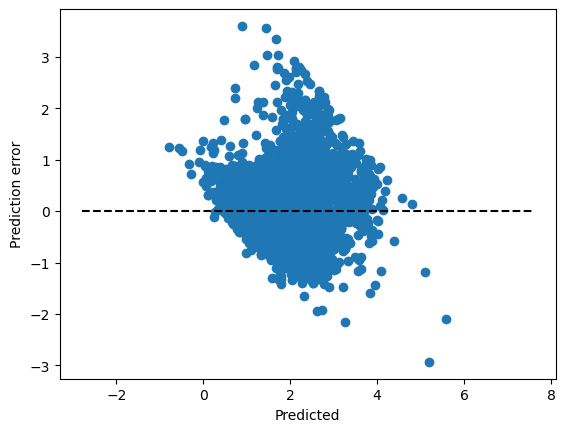

In [12]:
y_pred_ridge_error = y_test - y_pred_ridge

fig = plt.figure()
plt.scatter(y_pred, y_pred_ridge_error)
plt.xlabel('Predicted')
plt.ylabel('Prediction error')
plt.plot([min(y_pred)-2, max(y_pred)+2], [0,0], linestyle='dashed', color='black')

               Model       MSE  R2 Score
0  Linear Regression  0.423897  0.574870
1   Ridge Regression  0.424024  0.574742
2   Lasso Regression  0.433889  0.564848


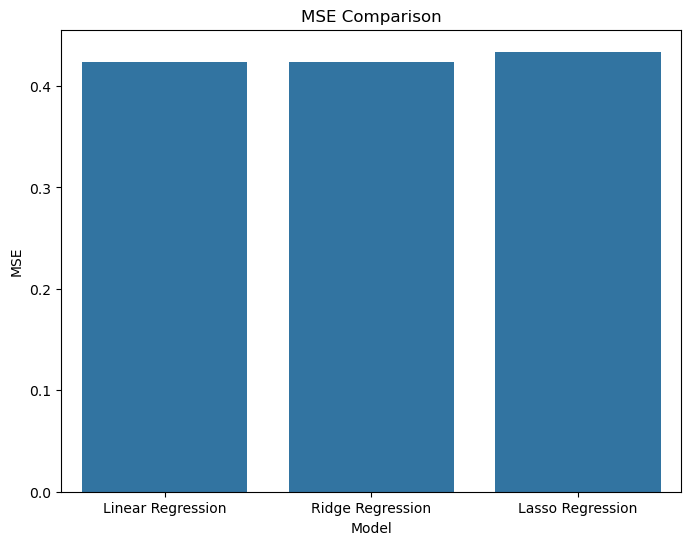

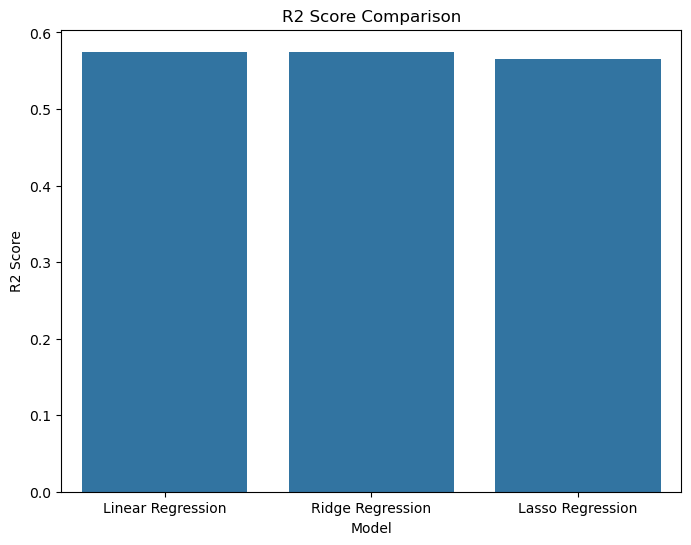

In [13]:
# Combine the MSE and R2 scores of all models for comparison
model_performance = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [mean_squared_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred_ridge),
            mean_squared_error(y_test, y_pred_lasso)],
    "R2 Score": [r2_score(y_test, y_pred),
                 r2_score(y_test, y_pred_ridge),
                 r2_score(y_test, y_pred_lasso)]
}


performance_df = pd.DataFrame(model_performance)

# Display the comparison table
print(performance_df)

# Plot MSE for comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MSE', data=performance_df)
plt.title('MSE Comparison')
plt.show()

# Plot R2 Score for comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='R2 Score', data=performance_df)
plt.title('R2 Score Comparison')
plt.show()


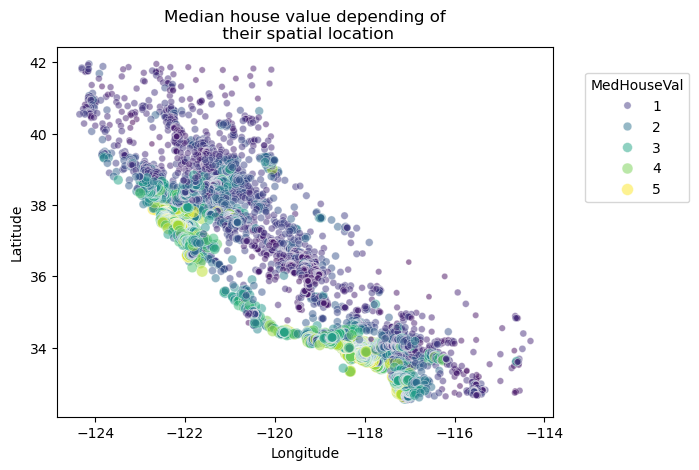

In [14]:
import seaborn as sns

sns.scatterplot(
    data=ca_df_new,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")